# Task 1: Setting the Baseline 
## Task 1.1 Data Preparation and Validation Pipeline

In [1]:
import pandas as pd 
import numpy as np

df_raw_train = pd.read_csv("./kaggle/input/3bodyproblem/mlNOVA/mlNOVA/X_train.csv")
df_raw_test = pd.read_csv("./kaggle/input/3bodyproblem/mlNOVA/mlNOVA/X_test.csv")

### Check for any missing values

In [2]:
print("Summary of the missing\nvalues in the training set\n")
print(df_raw_train.isna().sum())
print()

print("Summary of the missing\nvalues in the test set\n")
print(df_raw_test.isna().sum())

Summary of the missing
values in the training set

t        0
x_1      0
y_1      0
v_x_1    0
v_y_1    0
x_2      0
y_2      0
v_x_2    0
v_y_2    0
x_3      0
y_3      0
v_x_3    0
v_y_3    0
Id       0
dtype: int64

Summary of the missing
values in the test set

Id      0
t       0
x0_1    0
y0_1    0
x0_2    0
y0_2    0
x0_3    0
y0_3    0
dtype: int64


### Visualize few trajectories

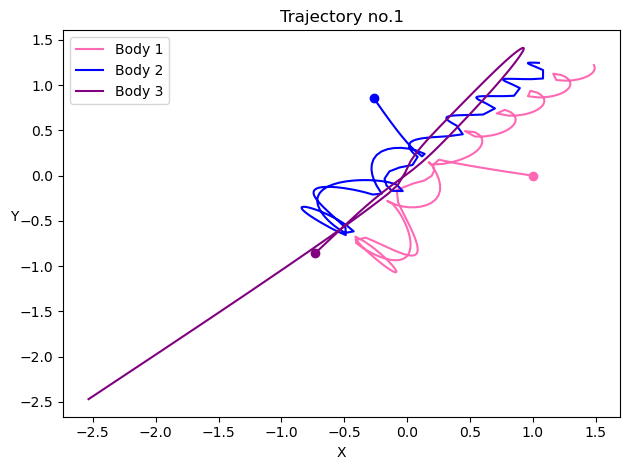

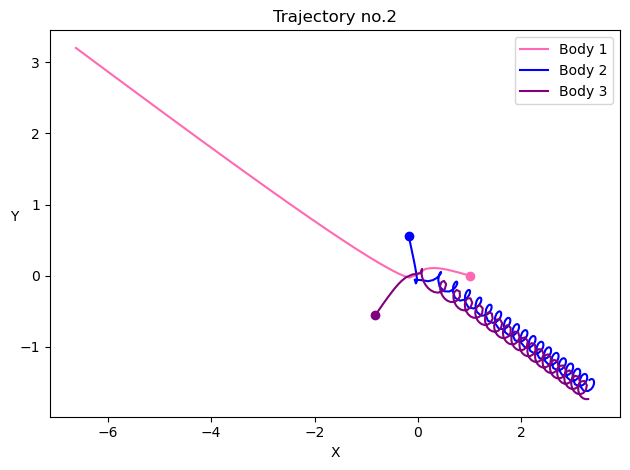

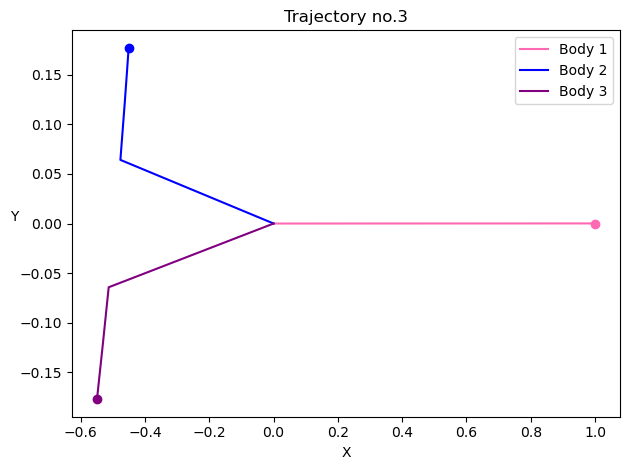

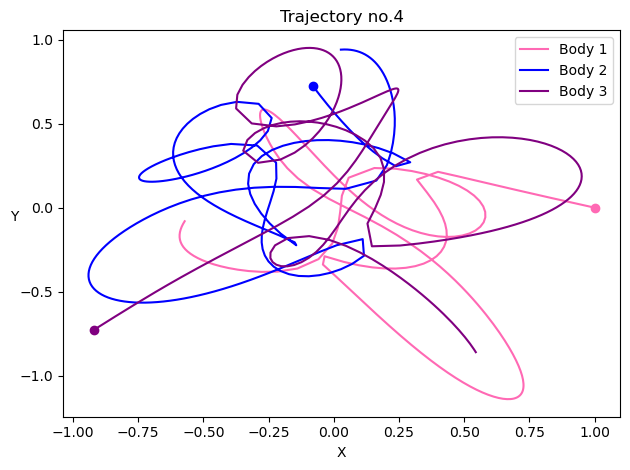

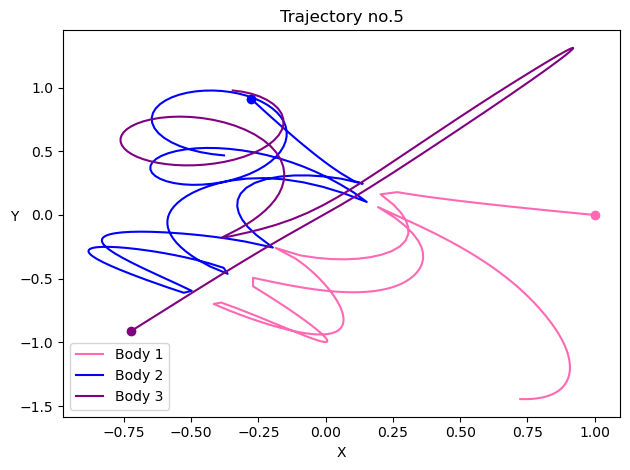

In [3]:
import matplotlib.pyplot as plt

start = 0
end = 257

for i in range(5):
    trajectory = df_raw_train[start:end]
    x1, y1, x2, y2, x3, y3 = trajectory.x_1, trajectory.y_1, trajectory.x_2, trajectory.y_2, trajectory.x_3, trajectory.y_3
    plt.plot(x1, y1, color="hotpink", label = "Body 1")
    plt.plot(x2, y2, color="blue", label = "Body 2")
    plt.plot(x3, y3, color="purple", label = "Body 3")
    plt.scatter(x1[start], y1[start], color="hotpink")
    plt.scatter(x2[start], y2[start], color="blue")
    plt.scatter(x3[start], y3[start], color="purple")
    plt.xlabel("X")
    plt.ylabel("Y", rotation=0)
    plt.title("Trajectory no." + str(i+1))
    plt.legend()
    plt.tight_layout()
    plt.show()

    start += 257
    end += 257


### Prepare the dataset

In [4]:
df_raw_train["group"] = df_raw_train["Id"]//257

In [5]:
#All starting positions
df_init = df_raw_train[ df_raw_train.index%257 == 0]

In [6]:
df_combined = df_raw_train.merge(df_init, on="group",  suffixes=('', '_init'))

# Step 1: Create a list/array of unique group_ids
unique_groups = df_combined['Id_init'].unique()

# Step 2: Create a random mask for this list
mask_train_test = np.random.rand(len(unique_groups)) < 0.8  # random True/False values

# Step 3: Split unique groups into two sets
group_train = unique_groups[mask_train_test]  # groups for the training set
group_testing = unique_groups[~mask_train_test]  # groups for the test set

# Step 4: Use the mask to split the DataFrame
train_set = df_combined[df_combined['Id_init'].isin(group_train)]
testing_set = df_combined[df_combined['Id_init'].isin(group_testing)]


unique_groups1 = testing_set['Id_init'].unique()

mask_val_test = np.random.rand(len(unique_groups1)) < 0.5

group_validation = unique_groups1[mask_val_test]  # groups for the training set
group_test = unique_groups1[~mask_val_test]  # groups for the test set

validation_set = testing_set[testing_set['Id_init'].isin(group_validation)]
test_set = testing_set[testing_set['Id_init'].isin(group_test)]



In [7]:
train_set

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,...,v_y_1_init,x_2_init,y_2_init,v_x_2_init,v_y_2_init,x_3_init,y_3_init,v_x_3_init,v_y_3_init,Id_init
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284995,9.843750,-0.022787,-0.354678,-1.450539,-0.511101,-0.128897,-0.618452,1.066492,-0.497032,0.151684,...,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743
1284996,9.882810,-0.082072,-0.384254,-1.556362,-1.038875,-0.084507,-0.627569,1.177829,0.065469,0.166578,...,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743
1284997,9.921880,-0.140434,-0.438907,-1.348462,-1.794786,-0.040823,-0.610311,0.975436,0.853069,0.181257,...,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743
1284998,9.960940,-0.177344,-0.524277,-0.380080,-2.492241,-0.018380,-0.561151,0.012292,1.579595,0.195724,...,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743


In [8]:
validation_set

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,...,v_y_1_init,x_2_init,y_2_init,v_x_2_init,v_y_2_init,x_3_init,y_3_init,v_x_3_init,v_y_3_init,Id_init
771,0.000000,1.000000,0.000000,0.000000,0.000000,-0.081487,0.726750,0.000000,0.000000,-0.918513,...,0.0,-0.081487,0.726750,0.0,0.0,-0.918513,-0.726750,0.0,0.0,771
772,0.039062,0.999457,0.000186,-0.027789,0.009550,-0.081250,0.726264,0.012175,-0.024874,-0.918208,...,0.0,-0.081487,0.726750,0.0,0.0,-0.918513,-0.726750,0.0,0.0,771
773,0.078125,0.997828,0.000746,-0.055653,0.019130,-0.080536,0.724806,0.024396,-0.049803,-0.917292,...,0.0,-0.081487,0.726750,0.0,0.0,-0.918513,-0.726750,0.0,0.0,771
774,0.117188,0.995107,0.001682,-0.083671,0.028770,-0.079342,0.722372,0.036711,-0.074842,-0.915765,...,0.0,-0.081487,0.726750,0.0,0.0,-0.918513,-0.726750,0.0,0.0,771
775,0.156250,0.991288,0.002995,-0.111923,0.038501,-0.077666,0.718956,0.049166,-0.100048,-0.913622,...,0.0,-0.081487,0.726750,0.0,0.0,-0.918513,-0.726750,0.0,0.0,771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279855,9.843750,-1.787958,0.511981,0.129688,0.062310,0.811627,-0.127576,-1.300376,0.276143,0.976331,...,0.0,-0.126971,0.344264,0.0,0.0,-0.873029,-0.344264,0.0,0.0,1279603
1279856,9.882810,-1.782702,0.514362,0.139426,0.059566,0.764951,-0.122518,-1.094635,0.006545,1.017751,...,0.0,-0.126971,0.344264,0.0,0.0,-0.873029,-0.344264,0.0,0.0,1279603
1279857,9.921880,-1.777064,0.516634,0.149259,0.056782,0.725740,-0.125791,-0.917045,-0.162741,1.051325,...,0.0,-0.126971,0.344264,0.0,0.0,-0.873029,-0.344264,0.0,0.0,1279603
1279858,9.960940,-1.771040,0.518797,0.159190,0.053948,0.693046,-0.134566,-0.759584,-0.280068,1.077994,...,0.0,-0.126971,0.344264,0.0,0.0,-0.873029,-0.344264,0.0,0.0,1279603


In [9]:
test_set

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,...,v_y_1_init,x_2_init,y_2_init,v_x_2_init,v_y_2_init,x_3_init,y_3_init,v_x_3_init,v_y_3_init,Id_init
2056,0.000000,1.000000,0.000000,0.000000,0.000000,-0.244125,0.497038,0.000000,0.000000,-0.755875,...,0.0,-0.244125,0.497038,0.0,0.0,-0.755875,-0.497038,0.0,0.0,2056
2057,0.039062,0.999385,0.000095,-0.031512,0.004880,-0.244010,0.496337,0.005905,-0.035879,-0.755375,...,0.0,-0.244125,0.497038,0.0,0.0,-0.755875,-0.497038,0.0,0.0,2056
2058,0.078125,0.997537,0.000381,-0.063120,0.009763,-0.243664,0.494233,0.011792,-0.071895,-0.753873,...,0.0,-0.244125,0.497038,0.0,0.0,-0.755875,-0.497038,0.0,0.0,2056
2059,0.117188,0.994451,0.000858,-0.094920,0.014651,-0.243089,0.490717,0.017644,-0.108187,-0.751362,...,0.0,-0.244125,0.497038,0.0,0.0,-0.755875,-0.497038,0.0,0.0,2056
2060,0.156250,0.990117,0.001526,-0.127012,0.019549,-0.242286,0.485775,0.023440,-0.144901,-0.747831,...,0.0,-0.244125,0.497038,0.0,0.0,-0.755875,-0.497038,0.0,0.0,2056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273944,9.843750,0.986689,1.246702,-0.472915,-0.461216,0.673360,1.257126,0.603699,0.736055,-1.660049,...,0.0,-0.412290,0.299072,0.0,0.0,-0.587710,-0.299072,0.0,0.0,1273692
1273945,9.882810,0.959601,1.229448,-0.941272,-0.404328,0.705516,1.285053,1.069944,0.675972,-1.665117,...,0.0,-0.412290,0.299072,0.0,0.0,-0.587710,-0.299072,0.0,0.0,1273692
1273946,9.921880,0.909363,1.218017,-1.719037,-0.097860,0.760739,1.307034,1.845613,0.366334,-1.670102,...,0.0,-0.412290,0.299072,0.0,0.0,-0.587710,-0.299072,0.0,0.0,1273692
1273947,9.960940,0.817637,1.261221,-1.196929,4.580955,0.857369,1.274255,1.321424,-4.315629,-1.675006,...,0.0,-0.412290,0.299072,0.0,0.0,-0.587710,-0.299072,0.0,0.0,1273692


### Verify dataset splitting

In [10]:
# Get sorted unique Id_init values
unique_sorted_ids_train = sorted(set(train_set['Id_init'].values))
unique_sorted_ids_val = sorted(set(validation_set['Id_init'].values))
unique_sorted_ids_test = sorted(set(test_set['Id_init'].values))

# Find intersection of the two sets
intersection_ids1 = sorted(set(unique_sorted_ids_train) & set(unique_sorted_ids_val))
intersection_ids2 = sorted(set(unique_sorted_ids_train) & set(unique_sorted_ids_test))
intersection_ids3 = sorted(set(unique_sorted_ids_test) & set(unique_sorted_ids_val))

# Display the results]
print("Intersection between train and validation sets:", intersection_ids1)
print("Intersection between train and test sets:", intersection_ids2)
print("Intersection between validation and test sets:", intersection_ids3)

Intersection between train and validation sets: []
Intersection between train and test sets: []
Intersection between validation and test sets: []


In [11]:
input_train = train_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]
input_validation = validation_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]
input_test = test_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]

input_train.head()

,t,x_1_init,y_1_init,x_2_init,y_2_init,x_3_init,y_3_init
0,0.000000,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196
1,0.039062,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196
2,0.078125,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196
3,0.117188,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196
4,0.156250,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196


In [12]:
input_validation.head()

,t,x_1_init,y_1_init,x_2_init,y_2_init,x_3_init,y_3_init
771,0.000000,1.0,0.0,-0.081487,0.72675,-0.918513,-0.72675
772,0.039062,1.0,0.0,-0.081487,0.72675,-0.918513,-0.72675
773,0.078125,1.0,0.0,-0.081487,0.72675,-0.918513,-0.72675
774,0.117188,1.0,0.0,-0.081487,0.72675,-0.918513,-0.72675
775,0.156250,1.0,0.0,-0.081487,0.72675,-0.918513,-0.72675


In [13]:
output_train = train_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]
output_validation = validation_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]
output_test = test_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]

output_train.head()

,x_1,y_1,x_2,y_2,x_3,y_3
0,1.000000,0.000000,-0.266467,0.859196,-0.733533,-0.859196
1,0.999548,0.000092,-0.266261,0.858781,-0.733287,-0.858874
2,0.998190,0.000370,-0.265641,0.857535,-0.732549,-0.857905
3,0.995925,0.000833,-0.264606,0.855456,-0.731318,-0.856289
4,0.992747,0.001483,-0.263154,0.852540,-0.729592,-0.854022


In [14]:
output_validation.head()


,x_1,y_1,x_2,y_2,x_3,y_3
771,1.000000,0.000000,-0.081487,0.726750,-0.918513,-0.726750
772,0.999457,0.000186,-0.081250,0.726264,-0.918208,-0.726450
773,0.997828,0.000746,-0.080536,0.724806,-0.917292,-0.725552
774,0.995107,0.001682,-0.079342,0.722372,-0.915765,-0.724053
775,0.991288,0.002995,-0.077666,0.718956,-0.913622,-0.721952


In [15]:
groups = train_set["group"]
groups

0             0
1             0
2             0
3             0
4             0
           ... 
1284995    4999
1284996    4999
1284997    4999
1284998    4999
1284999    4999
Name: group, Length: 1039565, dtype: int64

### Function to save predictions to csv

In [16]:
def save_predictions_to_csv(predictions: np.ndarray, output_file_name: str):

    """
    Saves the given NumPy array with predictions to a CSV file.

    Parameters:
    - predictions (np.ndarray): A NumPy array containing the data to be saved.
    - output_file_name (str): The name of the output CSV file (without .csv extension).
    """

    predictions_df = pd.DataFrame(predictions, columns=["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"])
    predictions_df.insert(0, 'Id', range(len(predictions_df)))
    predictions_df.to_csv("./output/csv/"+output_file_name+".csv", index=False)

## Task 1.2 Learn the baseline model

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(random_state=1, max_iter=3)
svm = SVR(kernel="linear")
model = LinearRegression()
modelRidge = Ridge()
modelLasso = Lasso()

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    [
            ('scaling', StandardScaler()), 
            ("model", model)
    ])
pipe

Pipeline(steps=[('scaling', StandardScaler()), ('model', LinearRegression())])

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GroupKFold

    
pipe.fit(input_train, output_train)
y_hat = pipe.predict(input_validation)
rmse = np.sqrt(mean_squared_error(output_validation, y_hat, squared = False))

print("RMSE: ", rmse)

RMSE:  1.0989490099582164


c:\Users\Magda\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [20]:
import numpy as np

def plot_y_yhat(y_validation, y_pred, plot_title = "plot"):
    labels = ['x_1','y_1','x_2','y_2','x_3','y_3']
    MAX = 500
    if len(y_validation) > MAX:
        idx = np.random.choice(len(y_validation),MAX, replace=False)
    else:
        idx = np.arange(len(y_validation))
    plt.figure(figsize=(10,10))
    for i in range(6):
        x0 = np.min(y_validation[idx,i])
        x1 = np.max(y_validation[idx,i])
        plt.subplot(3,2,i+1)
        plt.scatter(y_validation[idx,i],y_pred[idx,i])
        plt.xlabel('True '+labels[i])
        plt.ylabel('Predicted '+labels[i])
        plt.plot([x0,x1],[x0,x1],color='red')
        plt.axis('square')
    plt.savefig("./output/plots/"+plot_title+'.pdf')
    plt.show()

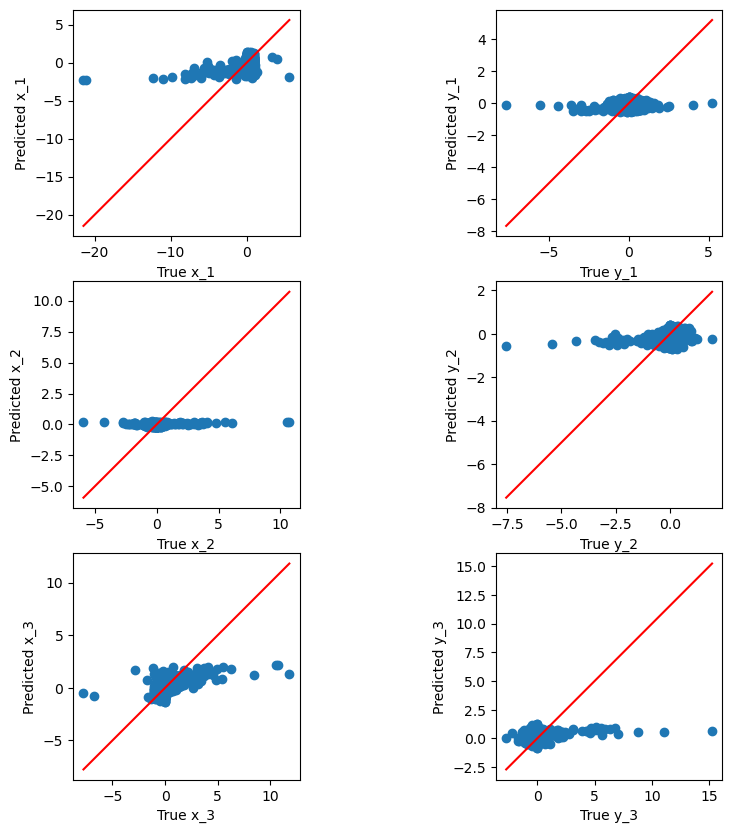

In [21]:
plot_y_yhat(output_validation.to_numpy(), pd.DataFrame(y_hat).to_numpy(), "baseline-ridge")


# Task 2: Nonlinear models on the data — the Polynomial Regression model
## Task 2.1 Development

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

def validate_poly_regression(X_train, y_train, X_val, y_val, regressor=None, degrees=range(1,9), max_features=None):
    
    #best_rsme = [1000, 1000, 1000]
    best_degrees_rsmes = [[0, 1000], [0, 1000], [0, 1000]]
    train_scores = []
    validation_scores = []
    n_features_list = []

    for d in degrees:
        print("Degree ", d)

        pipe_d_degree= Pipeline(
    [       ('preprocessor', PolynomialFeatures(degree=d)),
            ('model', RidgeCV(alphas=np.logspace(-6, 6, 13)))
    ])

        pipe_d_degree.fit(X_train, y_train)

        n_features = pipe_d_degree.named_steps['preprocessor'].n_output_features_
        n_features_list.append(n_features)

        y_train_predict = pipe_d_degree.predict(X_train)
        y_val_predict = pipe_d_degree.predict(X_val)


        train_error = np.sqrt(mean_squared_error(y_train, y_train_predict))
        #print("Train RMSE:", train_error)

        val_error = np.sqrt(mean_squared_error(y_val, y_val_predict))
        print("Val RMSE:", val_error)

        if val_error < best_degrees_rsmes[2][1]:
            best_degrees_rsmes[2][1] = val_error
            best_degrees_rsmes[2][0] = d
            best_degrees_rsmes.sort(key=lambda x: x[1], reverse=False)

        train_scores.append(train_error)
        validation_scores.append(val_error)
    
    best_degrees = [item[0] for item in best_degrees_rsmes]
    best_rsmes = [item[1] for item in best_degrees_rsmes]

    return train_scores, validation_scores, best_rsmes, best_degrees, n_features_list

In [51]:
degrees=range(1,5)
degree_scores = {d: {'train_scores': [], 'test_scores': []} for d in degrees}
best_rsmes = []
best_degrees = []

for _ in range(5):

    sample_train_set = train_set.sample(frac=0.0001)
    sample_input_train = sample_train_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]
    sample_output_train = sample_train_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]
    
    train_scores, validation_scores, best_rsme, best_degree, n_features_list = validate_poly_regression(sample_input_train, sample_output_train, input_validation, output_validation, degrees=degrees)

    best_rsmes.append(min(best_rsme))
    best_degrees.append(best_degree[0])
    best_degrees.append(best_degree[1])
    best_degrees.append(best_degree[2])

    for d in degrees:
        degree_scores[d]['train_scores'].append(train_scores[d-1])
        degree_scores[d]['test_scores'].append(validation_scores[d-1])

# Save best RMSEs and degrees to CSV
#
# df_best = pd.DataFrame({
#    'best_degree': best_degrees,
#    'best_rsme': best_rsmes
#    
#})

#df_best.to_csv('./output/csv/PR_best_rsme_degrees.csv', index=False)

print(n_features_list)

Degree  1
Val RMSE: 1.3483078738416188
Degree  2
Val RMSE: 1.3399973565928327
Degree  3
Val RMSE: 1.3349231674109332
Degree  4
Val RMSE: 1.340956614951879
Degree  1
Val RMSE: 1.3551415020543296
Degree  2
Val RMSE: 1.346673281702679
Degree  3
Val RMSE: 1.368332566447525
Degree  4
Val RMSE: 1.3885550774541167
Degree  1
Val RMSE: 1.3556033586290193
Degree  2
Val RMSE: 1.3479162196283316
Degree  3
Val RMSE: 1.3306383714534793
Degree  4
Val RMSE: 1.3273789535044958
Degree  1
Val RMSE: 1.3969812952642893
Degree  2
Val RMSE: 1.3872314388389682
Degree  3
Val RMSE: 1.3494257305698547
Degree  4
Val RMSE: 1.3629512134040844
Degree  1
Val RMSE: 1.3681810049924454
Degree  2
Val RMSE: 1.3407777165588008
Degree  3
Val RMSE: 1.3545197473828465
Degree  4
Val RMSE: 1.3709968902345178
[8, 36, 120, 330]


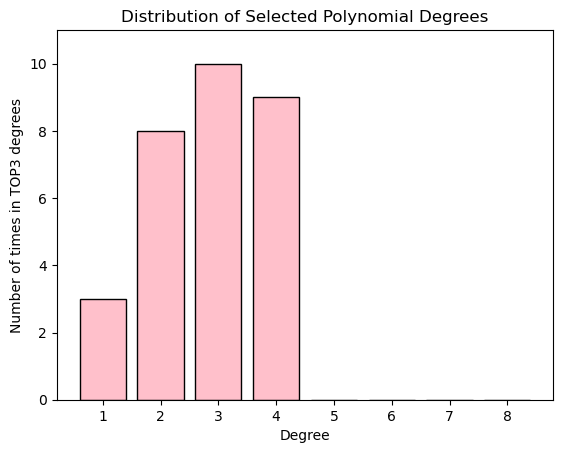

In [25]:
import matplotlib.pyplot as plt

# Degrees (x-axis labels) and their counts (y-axis values)
degrees = [1, 2, 3, 4, 5, 6, 7, 8]  # Polynomial degrees
counts = [3, 8, 10, 9, 0, 0, 0, 0]  # Manually assigned counts, total = 30

# Create bin edges so that each bar is centered on its respective integer
bin_edges = [i - 0.5 for i in range(1, len(degrees) + 2)]  # Bin edges

# Plotting the histogram manually
plt.bar(degrees, counts, color='pink', edgecolor='black')

# Set x-axis ticks to match polynomial degrees
plt.xticks(degrees)

# Setting y-axis limit to make sure the largest bar does not exceed 10
plt.ylim(0, 11)

# Add titles and labels
plt.title('Distribution of Selected Polynomial Degrees')
plt.xlabel('Degree')
plt.ylabel('Number of times in TOP3 degrees')

# Display the plot
plt.show()


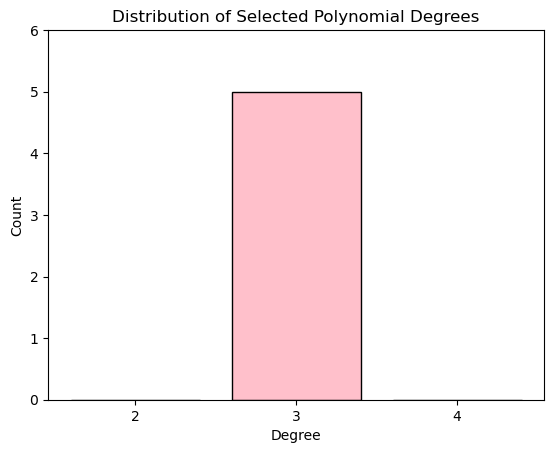

In [27]:
import matplotlib.pyplot as plt

# Degrees (x-axis labels) and their counts (y-axis values)
degrees = [2, 3, 4]  # Polynomial degrees
counts = [0, 5, 0]  # Manually assigned counts, total = 30

# Create bin edges so that each bar is centered on its respective integer
bin_edges = [i - 0.5 for i in range(1, len(degrees) + 2)]  # Bin edges

# Plotting the histogram manually
plt.bar(degrees, counts, color='pink', edgecolor='black')

# Set x-axis ticks to match polynomial degrees
plt.xticks(degrees)

# Setting y-axis limit to make sure the largest bar does not exceed 10
plt.ylim(0, 6)

# Add titles and labels
plt.title('Distribution of Selected Polynomial Degrees')
plt.xlabel('Degree')
plt.ylabel('Count')

# Display the plot
plt.show()


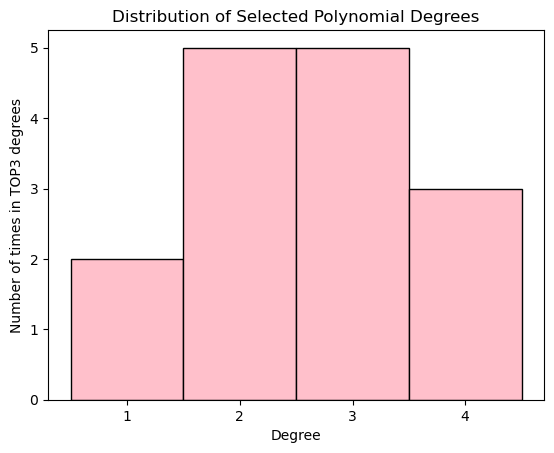

In [53]:
import matplotlib.pyplot as plt

# Create bin edges so that each bar is centered on its respective integer
bin_edges = [i - 0.5 for i in range(1, len(degrees) + 2)]  # Create bin edges

plt.hist(best_degrees, bins=bin_edges, color='pink', edgecolor='black')

plt.xticks(range(1, len(degrees) + 1))
#plt.yaxis.get_major_locator().set_params(integer=True)

plt.title('Distribution of Selected Polynomial Degrees')
plt.xlabel('Degree')
plt.ylabel('Number of times in TOP3 degrees')

plt.show()

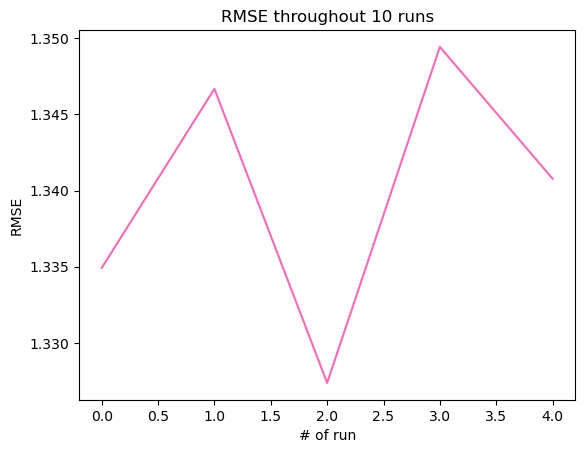

In [54]:
plt.plot(best_rsmes, color='hotpink')
plt.title('RMSE throughout 10 runs')
plt.xlabel('# of run')
plt.ylabel('RMSE')
plt.show()

### Train with the 3 best-degree models on more data

In [55]:
from collections import Counter

top_3_degrees = Counter(best_degrees).most_common(3)

most_frequent_degrees = [degree for degree, count in top_3_degrees]

print("Top 3 most frequent degrees:", sorted(most_frequent_degrees))


Top 3 most frequent degrees: [2, 3, 4]


In [61]:
degrees=sorted(most_frequent_degrees)
degree_scores = {d: {'train_scores': [], 'test_scores': []} for d in degrees}
best_rsmes_after_selection = []
best_degrees_after_selection = []

for _ in range(5):

    sample_train_set = train_set.sample(frac=0.10)
    sample_input_train = sample_train_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]
    sample_output_train = sample_train_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]
    
    train_scores, validation_scores, best_rsme, best_degree, n_features_list = validate_poly_regression(sample_input_train, sample_output_train, input_validation, output_validation, degrees=degrees)

    best_index = best_rsme.index(min(best_rsme))
    best_rsmes_after_selection.append(best_rsme[best_index])
    best_degrees_after_selection.append(best_degree[best_index])

    for d_index in range(len(degrees)):
        degree_scores[d_index]['train_scores'].append(train_scores[d_index])
        degree_scores[d_index]['test_scores'].append(validation_scores[d_index])

Degree  2
Val RMSE: 1.3014422056458268
Degree  3
Val RMSE: 1.265153629233177
Degree  4
Val RMSE: 1.2455404588465935


KeyError: 0

In [ ]:
# Create bin edges so that each bar is centered on its respective integer
bin_edges = [i - 0.5 for i in range(1, len(degrees) + 2)]  # Create bin edges

plt.hist(best_degrees_after_selection, bins=bin_edges, color='pink', edgecolor='black')

plt.xticks(range(1, len(most_frequent_degrees) + 1))
#plt.yaxis.get_major_locator().set_params(integer=True)

plt.title('Distribution of Selected Polynomial Degrees')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.show()

### Train on the best-degree model on all data

In [28]:
#best_degree_ever = max(set(best_degrees_after_selection), key=best_degrees_after_selection.count)

#print("Best degree", best_degree_ever)

pipe_best_degree= Pipeline(
[       ('preprocessor', PolynomialFeatures(degree=3)),
        ('model', RidgeCV(alphas=np.logspace(-6, 6, 13)))
])

pipe_best_degree.fit(input_train, output_train)

output_train_predict = pipe_best_degree.predict(input_train)
output_val_predict = pipe_best_degree.predict(input_validation)

train_error = np.sqrt(mean_squared_error(output_train, output_train_predict))
print("Train RMSE:", train_error)

val_error = np.sqrt(mean_squared_error(output_validation, output_val_predict))
print("Validation RMSE:", val_error)

Train RMSE: 1.2567840382345887
Validation RMSE: 1.1590150742159162


In [119]:
#best_degree_ever = max(set(best_degrees), key=best_degrees.count)

#print("Best degree", best_degree_ever)

pipe_best_degree= Pipeline(
[       ('preprocessor', PolynomialFeatures(degree=3)),
        ('model', RidgeCV(alphas=np.logspace(-6, 6, 13)))
])

pipe_best_degree.fit(input_train, output_train)

#output_train_predict = pipe_best_degree.predict(input_train)
#output_val_predict = pipe_best_degree.predict(input_validation)
output_test_predict = pipe_best_degree.predict(input_test)

#train_error = np.sqrt(mean_squared_error(output_train, output_train_predict))
#print("Train RMSE:", train_error)

#val_error = np.sqrt(mean_squared_error(output_validation, output_val_predict))
#print("Validation RMSE:", val_error)

test_error = np.sqrt(mean_squared_error(output_test, output_test_predict))
print("Validation RMSE:", test_error)

Validation RMSE: 1.1995211452393129


## Task 2.2 Evaluation

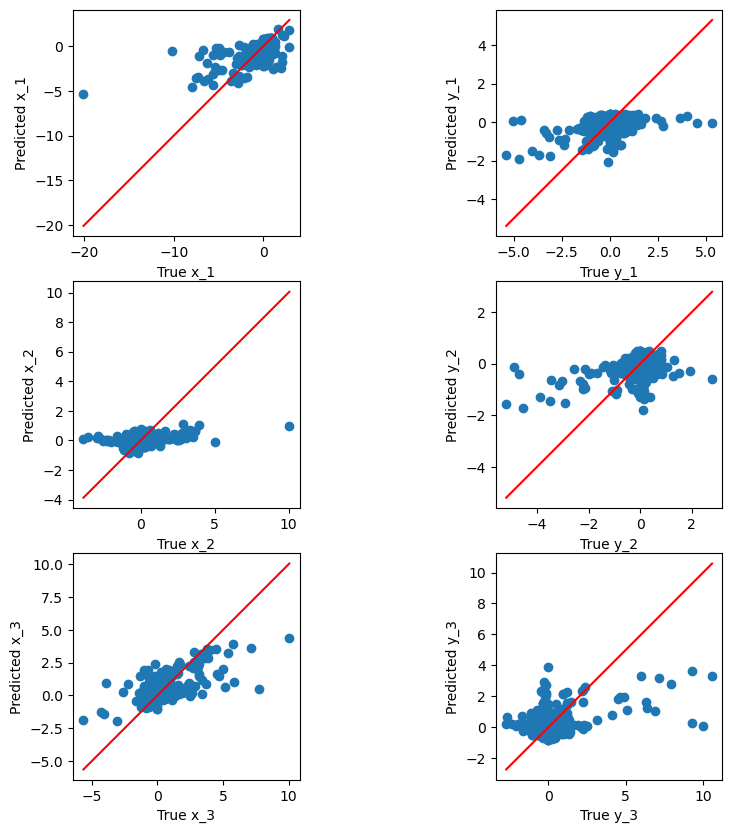

In [29]:
plot_y_yhat(output_validation.to_numpy(), pd.DataFrame(output_val_predict).to_numpy(), "2_2")

# Task 3: Feature Engineering
## Task 3.1 Removing variables

## Task 3.2 Evaluation of Variable Reduction

In [40]:

pipe_best_degree= Pipeline(
[       ('preprocessor', PolynomialFeatures(degree=3)),
        ('model', RidgeCV(alphas=np.logspace(-6, 6, 13)))
])

input_train_remove_var = input_train.copy()
input_train_remove_var = input_train_remove_var.drop(columns=["x_3_init", "y_3_init"])

input_validation_remove_var = input_validation.copy()
input_validation_remove_var = input_validation_remove_var.drop(columns=["x_3_init", "y_3_init"])

pipe_best_degree.fit(input_train_remove_var, output_train)

output_train_predict = pipe_best_degree.predict(input_train_remove_var)
output_val_predict = pipe_best_degree.predict(input_validation_remove_var)

train_error = np.sqrt(mean_squared_error(output_train, output_train_predict))
print("Train RMSE:", train_error)

val_error = np.sqrt(mean_squared_error(output_validation, output_val_predict))
print("Validation RMSE:", val_error)

Train RMSE: 1.257053921498389
Validation RMSE: 1.1594423554044084


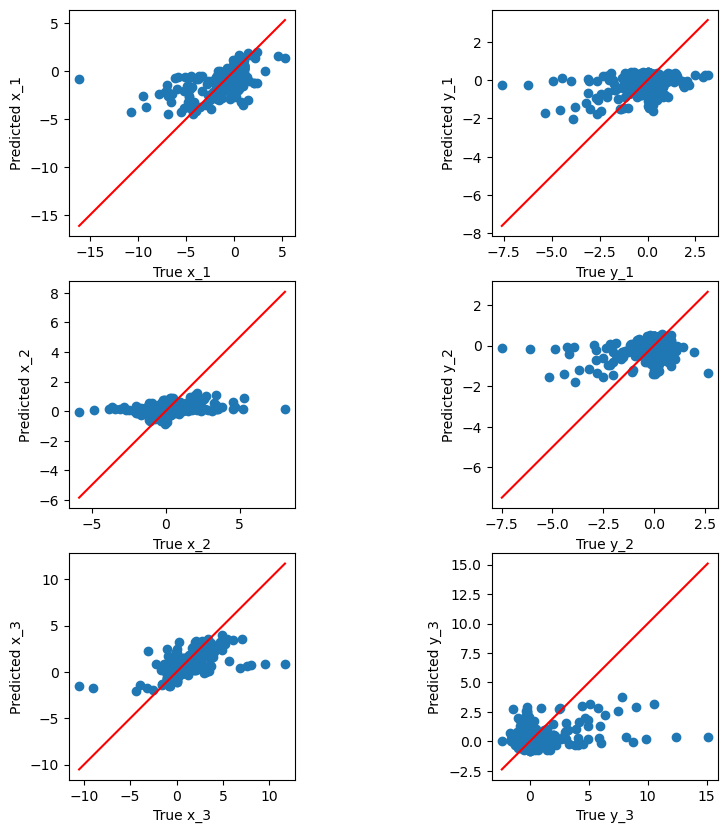

In [41]:
plot_y_yhat(output_validation.to_numpy(), pd.DataFrame(output_val_predict).to_numpy(), "3_2")

## Task 3.3 Adding Variables

In [34]:
input_train_add_var = input_train.copy()
input_train_add_var["d12"] = np.sqrt((input_train["x_1_init"] - input_train["x_2_init"])**2 + 
                                     (input_train["y_1_init"] - input_train["y_2_init"])**2)

input_train_add_var["d13"] = np.sqrt((input_train["x_1_init"] - input_train["x_3_init"])**2 + 
                                     (input_train["y_1_init"] - input_train["y_3_init"])**2)

input_train_add_var["d23"] = np.sqrt((input_train["x_3_init"] - input_train["x_2_init"])**2 + 
                                     (input_train["y_3_init"] - input_train["y_2_init"])**2)

input_validation_add_var = input_validation.copy()
input_validation_add_var["d12"] = np.sqrt((input_validation["x_1_init"] - input_validation["x_2_init"])**2 + 
                                     (input_validation["y_1_init"] - input_validation["y_2_init"])**2)

input_validation_add_var["d13"] = np.sqrt((input_validation["x_1_init"] - input_validation["x_3_init"])**2 + 
                                     (input_validation["y_1_init"] - input_validation["y_3_init"])**2)

input_validation_add_var["d23"] = np.sqrt((input_validation["x_3_init"] - input_validation["x_2_init"])**2 + 
                                     (input_validation["y_3_init"] - input_validation["y_2_init"])**2)

input_train_add_var.head()

,t,x_1_init,y_1_init,x_2_init,y_2_init,x_3_init,y_3_init,d12,d13,d23
257,0.000000,1.0,0.0,-0.176502,0.555739,-0.823498,-0.555739,1.301154,1.906303,1.286074
258,0.039062,1.0,0.0,-0.176502,0.555739,-0.823498,-0.555739,1.301154,1.906303,1.286074
259,0.078125,1.0,0.0,-0.176502,0.555739,-0.823498,-0.555739,1.301154,1.906303,1.286074
260,0.117188,1.0,0.0,-0.176502,0.555739,-0.823498,-0.555739,1.301154,1.906303,1.286074
261,0.156250,1.0,0.0,-0.176502,0.555739,-0.823498,-0.555739,1.301154,1.906303,1.286074


In [35]:
pipe.fit(input_train_add_var, output_train)
y_hat = pipe.predict(input_validation_add_var)
rmse_distance = np.sqrt(mean_squared_error(output_validation, y_hat, squared = False))

print("RMSE: ", rmse_distance)

RMSE:  1.1366855867266952


c:\Users\Magda\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
import numpy as np

# Creating a copy of the DataFrame
input_train_add_var_1 = input_train.copy()

# Calculating the x12 ratio with a check for division by zero
input_train_add_var_1["x12_ratio"] = np.where(input_train["x_2_init"] != 0, 
                                              input_train["x_1_init"] / input_train["x_2_init"], 
                                              0)

# Calculating the x13 ratio with a check for division by zero
input_train_add_var_1["x13_ratio"] = np.where(input_train["x_3_init"] != 0, 
                                              input_train["x_1_init"] / input_train["x_3_init"], 
                                              0)

# Calculating the x23 ratio with a check for division by zero
input_train_add_var_1["x23_ratio"] = np.where(input_train["x_3_init"] != 0, 
                                              input_train["x_2_init"] / input_train["x_3_init"], 
                                              0)

# Creating a copy of the DataFrame
input_val = input_validation.copy()

# Calculating the x12 ratio with a check for division by zero
input_val["x12_ratio"] = np.where(input_validation["x_2_init"] != 0, 
                                              input_validation["x_1_init"] / input_validation["x_2_init"], 
                                              0)

# Calculating the x13 ratio with a check for division by zero
input_val["x13_ratio"] = np.where(input_validation["x_3_init"] != 0, 
                                              input_validation["x_1_init"] / input_validation["x_3_init"], 
                                              0)

# Calculating the x23 ratio with a check for division by zero
input_val["x23_ratio"] = np.where(input_validation["x_3_init"] != 0, 
                                              input_validation["x_2_init"] / input_validation["x_3_init"], 
                                              0)

input_val.head()

,t,x_1_init,y_1_init,x_2_init,y_2_init,x_3_init,y_3_init,x12_ratio,x13_ratio,x23_ratio
0,0.000000,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196,-3.752805,-1.363266,0.363266
1,0.039062,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196,-3.752805,-1.363266,0.363266
2,0.078125,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196,-3.752805,-1.363266,0.363266
3,0.117188,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196,-3.752805,-1.363266,0.363266
4,0.156250,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196,-3.752805,-1.363266,0.363266


In [26]:
pipe.fit(input_train_add_var_1, output_train)
y_hat = pipe.predict(input_val)
rmse_ratiox = np.sqrt(mean_squared_error(output_validation, y_hat, squared = False))

print("RMSE: ", rmse_ratiox)

c:\Users\Magda\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE:  1.1457962244700086


In [27]:
import numpy as np

# Creating a copy of the DataFrame
input_train_add_var_1 = input_train.copy()

# Calculating the x12 ratio with a check for division by zero
input_train_add_var_1["x1_y1_ratio"] = np.where(input_train["y_1_init"] != 0, 
                                              input_train["x_1_init"] / input_train["y_1_init"], 
                                              0)

# Calculating the x13 ratio with a check for division by zero
input_train_add_var_1["x2_y2_ratio"] = np.where(input_train["y_2_init"] != 0, 
                                              input_train["x_2_init"] / input_train["y_2_init"], 
                                              0)

# Calculating the x23 ratio with a check for division by zero
input_train_add_var_1["x3_y3_ratio"] = np.where(input_train["y_3_init"] != 0, 
                                              input_train["x_3_init"] / input_train["y_3_init"], 
                                              0)

# Creating a copy of the DataFrame
input_val = input_validation.copy()

# Calculating the x12 ratio with a check for division by zero
input_val["x1_y1_ratio"] = np.where(input_validation["y_1_init"] != 0, 
                                              input_validation["x_1_init"] / input_validation["y_1_init"], 
                                              0)

# Calculating the x13 ratio with a check for division by zero
input_val["x2_y2_ratio"] = np.where(input_validation["y_2_init"] != 0, 
                                              input_validation["x_2_init"] / input_validation["y_2_init"], 
                                              0)

# Calculating the x23 ratio with a check for division by zero
input_val["x3_y3_ratio"] = np.where(input_validation["y_3_init"] != 0, 
                                              input_validation["x_3_init"] / input_validation["y_3_init"], 
                                              0)

In [28]:
input_val.head()

,t,x_1_init,y_1_init,x_2_init,y_2_init,x_3_init,y_3_init,x1_y1_ratio,x2_y2_ratio,x3_y3_ratio
0,0.000000,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196,0.0,-0.310136,0.853743
1,0.039062,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196,0.0,-0.310136,0.853743
2,0.078125,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196,0.0,-0.310136,0.853743
3,0.117188,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196,0.0,-0.310136,0.853743
4,0.156250,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196,0.0,-0.310136,0.853743


In [29]:
pipe.fit(input_train_add_var_1, output_train)
y_hat = pipe.predict(input_val)
rmse_ratio_points = np.sqrt(mean_squared_error(output_validation, y_hat, squared = False))

print("RMSE: ", rmse_ratio_points)

RMSE:  1.1454172251296233


c:\Users\Magda\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
import numpy as np

# Creating a copy of the train DataFrame
input_train_add_var_1 = input_train.copy()

# Calculating the inverse of x1, x2, x3 with a check for division by zero (train data)
input_train_add_var_1["x1_inverse"] = np.where(input_train["x_1_init"] != 0, 1 / input_train["x_1_init"], 0)
input_train_add_var_1["x2_inverse"] = np.where(input_train["x_2_init"] != 0, 1 / input_train["x_2_init"], 0)
input_train_add_var_1["x3_inverse"] = np.where(input_train["x_3_init"] != 0, 1 / input_train["x_3_init"], 0)

# Creating a copy of the validation DataFrame
input_val = input_validation.copy()

# Calculating the inverse of x1, x2, x3 with a check for division by zero (validation data)
input_val["x1_inverse"] = np.where(input_validation["x_1_init"] != 0, 1 / input_validation["x_1_init"], 0)
input_val["x2_inverse"] = np.where(input_validation["x_2_init"] != 0, 1 / input_validation["x_2_init"], 0)
input_val["x3_inverse"] = np.where(input_validation["x_3_init"] != 0, 1 / input_validation["x_3_init"], 0)


In [31]:
pipe.fit(input_train_add_var_1, output_train)
y_hat = pipe.predict(input_val)
rmse_inverse = np.sqrt(mean_squared_error(output_validation, y_hat, squared = False))

print("RMSE: ", rmse_inverse)

RMSE:  1.145791697747426


c:\Users\Magda\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
import numpy as np

# Creating a copy of the train DataFrame
input_train_add_var_1 = input_train.copy()

# Gravitational constant (G)
G = 6.67430e-11  # You can adjust this value as needed

# Calculating the x1_g term with division by zero protection (train data)
input_train_add_var_1["x1_g"] = np.where((input_train["x_1_init"] - input_train["x_2_init"] != 0) & 
                                         (input_train["x_1_init"] - input_train["x_3_init"] != 0),
                                         -G * np.where(input_train["x_1_init"] - input_train["x_2_init"] != 0,
                                                       (input_train["x_1_init"] - input_train["x_2_init"]) / (abs(input_train["x_1_init"] - input_train["x_2_init"])**3), 0)
                                         -G * np.where(input_train["x_1_init"] - input_train["x_3_init"] != 0,
                                                       (input_train["x_1_init"] - input_train["x_3_init"]) / (abs(input_train["x_1_init"] - input_train["x_3_init"])**3), 0),
                                         0)

# Calculating the x2_g term with division by zero protection
input_train_add_var_1["x2_g"] = -G * np.where(input_train["x_2_init"] - input_train["x_3_init"] != 0,
                                              (input_train["x_2_init"] - input_train["x_3_init"]) / (abs(input_train["x_2_init"] - input_train["x_3_init"])**3), 0) \
                                -G * np.where(input_train["x_2_init"] - input_train["x_1_init"] != 0,
                                              (input_train["x_2_init"] - input_train["x_1_init"]) / (abs(input_train["x_2_init"] - input_train["x_1_init"])**3), 0)

# Calculating the x3_g term with division by zero protection
input_train_add_var_1["x3_g"] = -G * np.where(input_train["x_3_init"] - input_train["x_1_init"] != 0,
                                              (input_train["x_3_init"] - input_train["x_1_init"]) / (abs(input_train["x_3_init"] - input_train["x_1_init"])**3), 0) \
                                -G * np.where(input_train["x_3_init"] - input_train["x_2_init"] != 0,
                                              (input_train["x_3_init"] - input_train["x_2_init"]) / (abs(input_train["x_3_init"] - input_train["x_2_init"])**3), 0)

# Calculating the y1_g term with division by zero protection
input_train_add_var_1["y1_g"] = -G * np.where(input_train["y_1_init"] - input_train["y_2_init"] != 0,
                                              (input_train["y_1_init"] - input_train["y_2_init"]) / (abs(input_train["y_1_init"] - input_train["y_2_init"])**3), 0) \
                                -G * np.where(input_train["y_1_init"] - input_train["y_3_init"] != 0,
                                              (input_train["y_1_init"] - input_train["y_3_init"]) / (abs(input_train["y_1_init"] - input_train["y_3_init"])**3), 0)

# Calculating the y2_g term with division by zero protection
input_train_add_var_1["y2_g"] = -G * np.where(input_train["y_2_init"] - input_train["y_3_init"] != 0,
                                              (input_train["y_2_init"] - input_train["y_3_init"]) / (abs(input_train["y_2_init"] - input_train["y_3_init"])**3), 0) \
                                -G * np.where(input_train["y_2_init"] - input_train["y_1_init"] != 0,
                                              (input_train["y_2_init"] - input_train["y_1_init"]) / (abs(input_train["y_2_init"] - input_train["y_1_init"])**3), 0)

# Calculating the y3_g term with division by zero protection
input_train_add_var_1["y3_g"] = -G * np.where(input_train["y_3_init"] - input_train["y_1_init"] != 0,
                                              (input_train["y_3_init"] - input_train["y_1_init"]) / (abs(input_train["y_3_init"] - input_train["y_1_init"])**3), 0) \
                                -G * np.where(input_train["y_3_init"] - input_train["y_2_init"] != 0,
                                              (input_train["y_3_init"] - input_train["y_2_init"]) / (abs(input_train["y_3_init"] - input_train["y_2_init"])**3), 0)

# Now repeat the same process for the validation dataset

# Creating a copy of the validation DataFrame
input_val = input_validation.copy()

# Calculating the x1_g term with division by zero protection (validation data)
input_val["x1_g"] = np.where((input_validation["x_1_init"] - input_validation["x_2_init"] != 0) & 
                             (input_validation["x_1_init"] - input_validation["x_3_init"] != 0),
                             -G * np.where(input_validation["x_1_init"] - input_validation["x_2_init"] != 0,
                                           (input_validation["x_1_init"] - input_validation["x_2_init"]) / (abs(input_validation["x_1_init"] - input_validation["x_2_init"])**3), 0)
                             -G * np.where(input_validation["x_1_init"] - input_validation["x_3_init"] != 0,
                                           (input_validation["x_1_init"] - input_validation["x_3_init"]) / (abs(input_validation["x_1_init"] - input_validation["x_3_init"])**3), 0),
                             0)

# Calculating the x2_g term with division by zero protection
input_val["x2_g"] = -G * np.where(input_validation["x_2_init"] - input_validation["x_3_init"] != 0,
                                  (input_validation["x_2_init"] - input_validation["x_3_init"]) / (abs(input_validation["x_2_init"] - input_validation["x_3_init"])**3), 0) \
                    -G * np.where(input_validation["x_2_init"] - input_validation["x_1_init"] != 0,
                                  (input_validation["x_2_init"] - input_validation["x_1_init"]) / (abs(input_validation["x_2_init"] - input_validation["x_1_init"])**3), 0)

# Calculating the x3_g term with division by zero protection
input_val["x3_g"] = -G * np.where(input_validation["x_3_init"] - input_validation["x_1_init"] != 0,
                                  (input_validation["x_3_init"] - input_validation["x_1_init"]) / (abs(input_validation["x_3_init"] - input_validation["x_1_init"])**3), 0) \
                    -G * np.where(input_validation["x_3_init"] - input_validation["x_2_init"] != 0,
                                  (input_validation["x_3_init"] - input_validation["x_2_init"]) / (abs(input_validation["x_3_init"] - input_validation["x_2_init"])**3), 0)

# Calculating the y1_g term with division by zero protection
input_val["y1_g"] = -G * np.where(input_validation["y_1_init"] - input_validation["y_2_init"] != 0,
                                  (input_validation["y_1_init"] - input_validation["y_2_init"]) / (abs(input_validation["y_1_init"] - input_validation["y_2_init"])**3), 0) \
                    -G * np.where(input_validation["y_1_init"] - input_validation["y_3_init"] != 0,
                                  (input_validation["y_1_init"] - input_validation["y_3_init"]) / (abs(input_validation["y_1_init"] - input_validation["y_3_init"])**3), 0)

# Calculating the y2_g term with division by zero protection
input_val["y2_g"] = -G * np.where(input_validation["y_2_init"] - input_validation["y_3_init"] != 0,
                                  (input_validation["y_2_init"] - input_validation["y_3_init"]) / (abs(input_validation["y_2_init"] - input_validation["y_3_init"])**3), 0) \
                    -G * np.where(input_validation["y_2_init"] - input_validation["y_1_init"] != 0,
                                  (input_validation["y_2_init"] - input_validation["y_1_init"]) / (abs(input_validation["y_2_init"] - input_validation["y_1_init"])**3), 0)

# Calculating the y3_g term with division by zero protection
input_val["y3_g"] = -G * np.where(input_validation["y_3_init"] - input_validation["y_1_init"] != 0,
                                  (input_validation["y_3_init"] - input_validation["y_1_init"]) / (abs(input_validation["y_3_init"] - input_validation["y_1_init"])**3), 0) \
                    -G * np.where(input_validation["y_3_init"] - input_validation["y_2_init"] != 0,
                                  (input_validation["y_3_init"] - input_validation["y_2_init"]) / (abs(input_validation["y_3_init"] - input_validation["y_2_init"])**3), 0)


In [33]:
pipe.fit(input_train_add_var_1, output_train)
y_hat = pipe.predict(input_val)
rmse_g = np.sqrt(mean_squared_error(output_validation, y_hat, squared = False))

print("RMSE: ", rmse_g)

RMSE:  1.1456955516052227


c:\Users\Magda\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


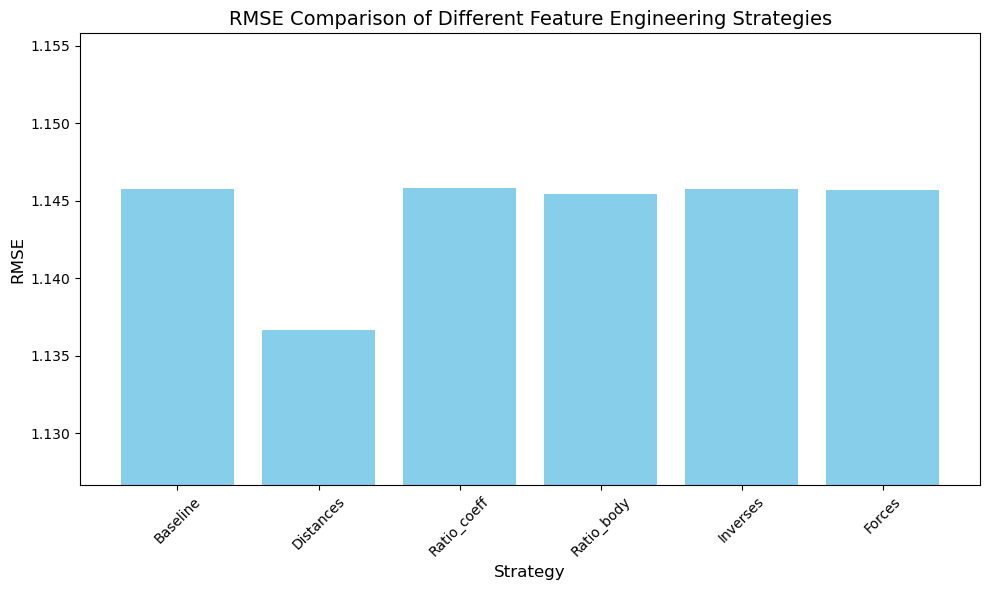

In [47]:
import matplotlib.pyplot as plt

# Sample RMSE values for each strategy
rmses = {
    "Baseline": rmse,  # Add your actual values here
    "Distances": rmse_distance,
    "Ratio_coeff": rmse_ratiox,
    "Ratio_body": rmse_ratio_points,
    "Inverses": rmse_inverse,
    "Forces": rmse_g
}

# Plotting the RMSEs with a customized y-axis range for better visibility
plt.figure(figsize=(10, 6))
plt.bar(rmses.keys(), rmses.values(), color='skyblue')
plt.title('RMSE Comparison of Different Feature Engineering Strategies', fontsize=14)
plt.xlabel('Strategy', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.xticks(rotation=45)

# Adjusting y-axis to focus on smaller differences (e.g., between 0.07 and 0.15)
plt.ylim(min(rmses.values()) - 0.01, max(rmses.values()) + 0.01)

plt.tight_layout()

# Display the plot
plt.show()


## Task 3.4 Evaluation of Variable Augmentation

In [31]:
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer

def create_custom_features(X):
    X_new = X.copy()
    X_new["d12"] = np.sqrt((X["x_1_init"] - X["x_2_init"])**2 + 
                                     (X["y_1_init"] - X["y_2_init"])**2)

    X_new["d13"] = np.sqrt((X["x_1_init"] - X["x_3_init"])**2 + 
                                        (X["y_1_init"] - X["y_3_init"])**2)

    X_new["d23"] = np.sqrt((X["x_3_init"] - X["x_2_init"])**2 + 
                                        (X["y_3_init"] - X["y_2_init"])**2)
    return X_new

pipe_best_degree = Pipeline([
            # Step 1: Create custom features like ratios
            ('custom_features', FunctionTransformer(create_custom_features, validate=False)),
            
            # Step 2: Apply column-wise transformation for polynomial and scaling
            ('preprocessor', ColumnTransformer(
                transformers=[
                    # Apply PolynomialFeatures to the original features
                    ('poly', PolynomialFeatures(degree=3, include_bias=False), ['x_1_init', 'x_2_init', 'x_3_init']),
                    
                    # Apply scaling to custom features created in Step 1
                    ('scaler', StandardScaler(), ['d12', 'd13', 'd23'])
                ],
                remainder='passthrough'  # To pass through any unlisted columns
            )),
            
            # Step 3: RidgeCV model with alpha selection
            ('model', RidgeCV(alphas=np.logspace(-6, 6, 13)))  # RidgeCV with cross-validated alpha
        ])

pipe_best_degree.fit(input_train, output_train)

output_train_predict = pipe_best_degree.predict(input_train)
output_val_predict = pipe_best_degree.predict(input_validation)
output_submission_predict = pipe_best_degree.predict(input_submission)

train_error = np.sqrt(mean_squared_error(output_train, output_train_predict))
print("Train RMSE:", train_error)

val_error = np.sqrt(mean_squared_error(output_validation, output_val_predict))
print("Validation RMSE:", val_error)

save_predictions_to_csv(output_submission_predict, "augmented_polynomial_submission")

Train RMSE: 1.2957926274326137
Validation RMSE: 1.215442441470571


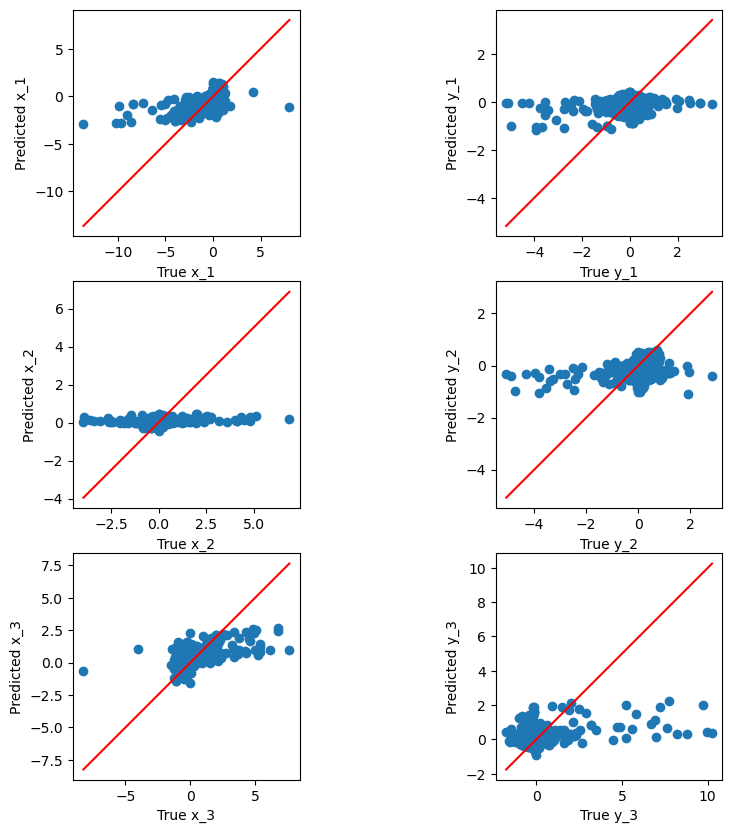

In [33]:
plot_y_yhat(output_validation.to_numpy(), pd.DataFrame(output_val_predict).to_numpy(), "3_4")

# Task 4: Nonparamentric Model — the k-Nearest Neighbors Regressor
## Task 4.1 Development

In [19]:
    
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

modelKnn = KNeighborsRegressor()

pipe = Pipeline(
    [
            ('scaling', StandardScaler()), 
            ("model", modelKnn)
    ])
pipe
    

Pipeline(steps=[('scaling', StandardScaler()),
                ('model', KNeighborsRegressor())])

In [20]:

pipe.fit(input_train, output_train)
y_hat = pipe.predict(input_validation)
rmse_list.append(mean_squared_error(output_validation, y_hat, squared = False))

print(rmse_list)
print("AVG:", sum(rmse_list)/len(rmse_list))


#def validate_knn_regression(X_train, y_train, X_val, y_val, k=range(1,15)):


NameError: name 'X_validation' is not defined

## Task 4.2 Evaluation

# Task 5 [Optional]